In [1]:
import numpy as np
from basis_expansions import Binner
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/Users/matthewdrury/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
x = np.random.uniform(size=250)

def signal(x):
    return (x*x*x*(x-1) 
            + 2*(1/(1 + np.exp(-0.5*(x - 0.5)))) 
            - 3.5*(x > 0.2)*(x < 0.5)*(x - 0.2)*(x - 0.5)
            - 0.95)

y = signal(x) + np.random.normal(scale=0.05, size=250)

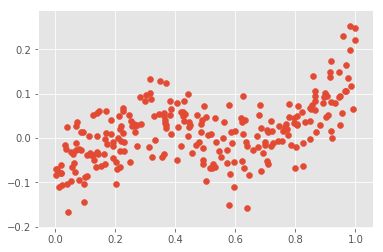

In [3]:
plt.scatter(x, y)

# Binned regression with dummy varaibles.

In [4]:
regressions = {}
for n_bins in range(2, 25):
    regressions[n_bins] = Pipeline([
        ('binner', Binner(0, 1, n_bins=n_bins)),
        ('regression', LinearRegression(fit_intercept=False))
    ])
    regressions[n_bins].fit(x, y)

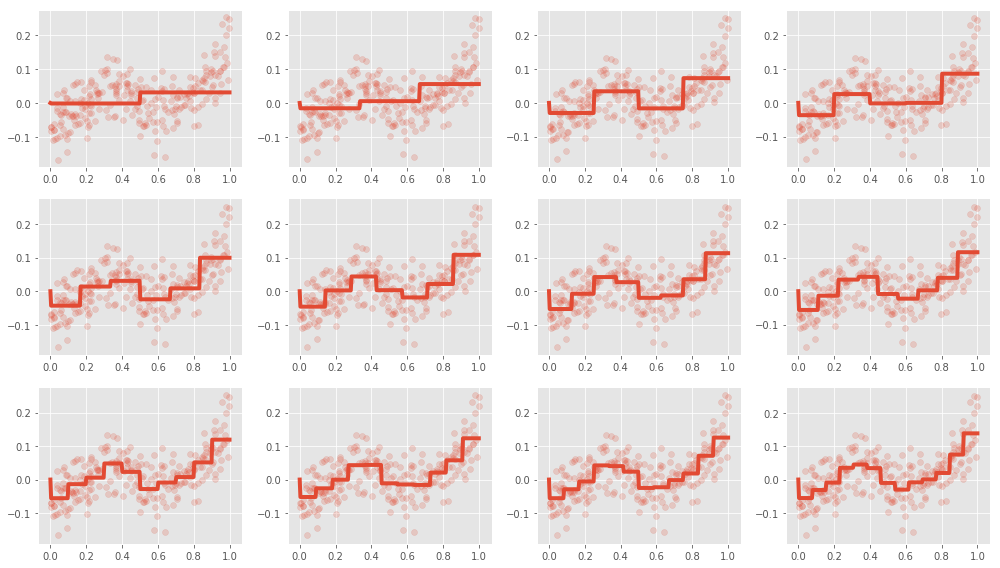

In [5]:
fig, ax = plt.subplots(3, 4, figsize=(14, 8))

t = np.linspace(0, 1, 250)
for i, ax in enumerate(ax.flatten()):
    n_bins = i + 4
    ax.plot(t, regressions[n_bins].predict(t), linewidth=4)
    ax.scatter(x, y, alpha=0.2)
    
fig.tight_layout()